In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os
from matplotlib.animation import FuncAnimation

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

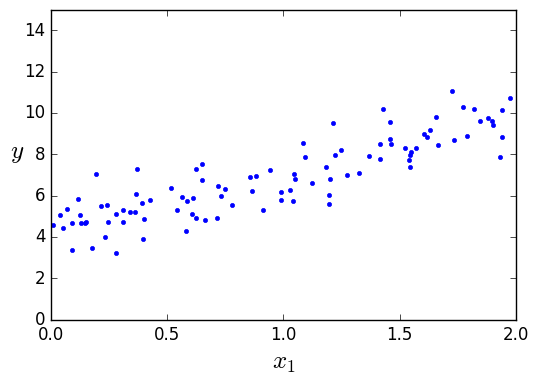

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

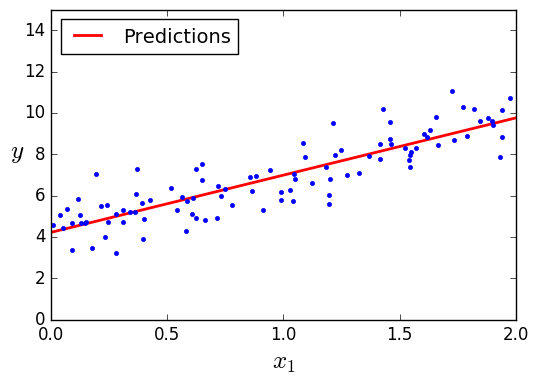

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

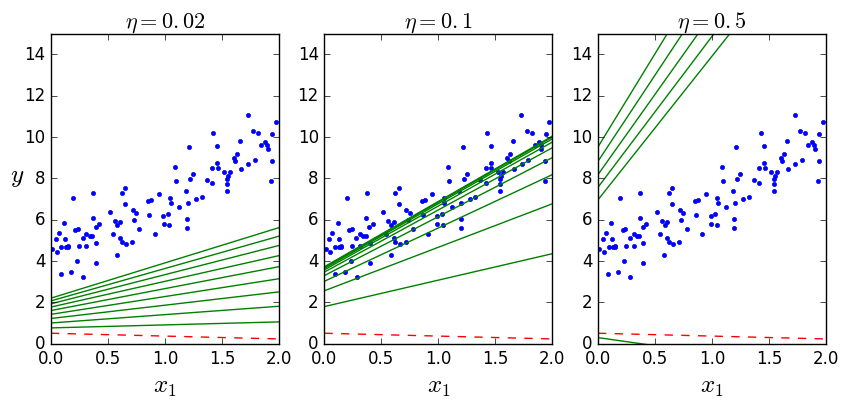

In [8]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "g-" if iteration > 0 else "r -- "
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [9]:
m_ = len(X_b)
print(m_)

100


In [10]:

eta2 = 0.5

def update(ii):      
    
    animlist = plt.cla()
    animlist = plt.plot(X, y, "b.")
    rnd.seed(42)
    theta2= rnd.randn(2,1)
    y_pre = X_new_b.dot(theta2)
    styles= "r-"
    animlist = plt.plot(X_new,y_pre,styles)
    gradients = 2/m_ * X_b.T.dot(X_b.dot(theta2) - y)
    theta2 = theta2 - eta2 * gradients
    
    animlist = plt.xlabel("$x_1$", fontsize=18)
    animlist = plt.title('Exp: %.2f'%(1.*ii))
    animlist = plt.axis([0, 2, 0, 15])
                  
    animlist = plt.plot(X_new, y_pre, styles)

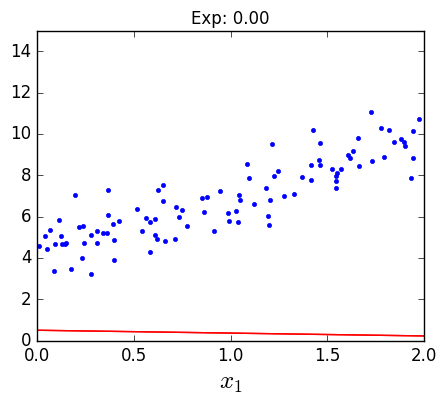

In [11]:
fig2 = plt.figure(figsize=(5,4))
anim = FuncAnimation(fig2, update, np.arange(0, 10), interval=200)
anim.save('aac.gif',dpi = 200, writer='imagemagick');

1.84147098481
0.292272179055
-0.15655869068
-0.225242438718
-0.231895152197
-0.232423166634
-0.232462475999
-0.232465349739
-0.232465558783
-0.232465573969
-0.232465575072
-0.232465575152
-0.232465575158
-0.232465575158
-0.232465575158
-0.232465575158


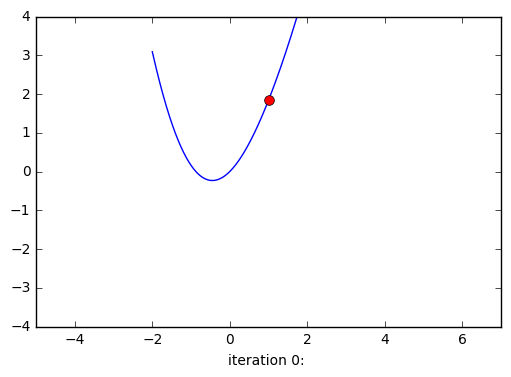

In [1]:
import math
import numpy as np 

import matplotlib.pyplot as plt

def grad(x):
	return 2*x + math.cos(x)

def cost(x):
	return x**2 + np.sin(x)

alpha = .3
x = [1]
for it in range(100):
	print cost(x[-1])
	x_new = x[-1] - alpha*grad(x[-1])

	if np.linalg.norm(x_new - x[-1]) < 1e-8:
		break 
	x.append(x_new)

x = np.asarray(x)
# print it, x_old
x0 = np.linspace(-2, 2, 1000)
y0 = cost(x0)

y = cost(x)
# plt.plot(x0, y0)
# plt.plot(x, y, 'ro', markersize=7)


fig, ax = plt.subplots()

def update(ii):
    label2 = 'iteration {0}: '.format(ii)

    animlist = plt.cla()
    animlist = plt.axis('equal')
    animlist = plt.axis([-5, 7, -20, 20])

    animlist = plt.plot(x0, y0)
    if ii == 0:
    	animlist = plt.plot(x[ii], y[ii], 'ro', markersize = 7)
    else:
    	animlist = plt.plot(x[ii-1:ii+1], y[ii-1:ii+1], 'ro', markersize = 7)
    	animlist = plt.plot([x[ii-1], x[ii]], [y[ii-1], y[ii]], 'k-')

    ax.set_xlabel(label2)
    return animlist, ax
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=1000)

plt.show()

